In [1]:
#Import analytics and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read data from csv file and show info and sample of it
gp=pd.read_csv('googleplaystore.csv')

In [3]:
#data cleaning
gp=gp[gp['Android Ver']!='NaN']
gp=gp[gp['Installs']!='NaN']
gp=gp[gp['Installs']!='Free']
##
gp['Installs']=gp['Installs'].apply(lambda x:x.replace('+',''))
gp['Installs']=gp['Installs'].apply(lambda x:x.replace(',',''))
gp['Installs']=gp['Installs'].apply(lambda x:int(x))

##
gp['Reviews']=gp['Reviews'].apply(lambda x:int(x))
##
gp['Size'] = gp['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

gp['Size'] = gp['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
gp['Size'] = gp['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
gp['Size'] = gp['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gp['Size'] = gp['Size'].apply(lambda x: float(x))
#########
gp['Price'] = gp['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
gp['Price'] = gp['Price'].apply(lambda x: float(x))

In [4]:
gp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              9145 non-null float64
Installs          10840 non-null int64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [6]:
print('Number of apps: ',len(gp['App'])) 

Number of apps:  10840


In [7]:
gp['Rating'].max()

5.0

In [8]:
gp['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [9]:
gp['Rating'].value_counts().head(5)

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
Name: Rating, dtype: int64

In [10]:
gp[gp['Rating']==5]#['App']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.000,1000,Free,0.00,Everyone,Comics,26-Jun-18,2,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.400,1000,Free,0.00,Mature 17+,Dating,17-Jul-18,3,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.000,100,Free,0.00,Mature 17+,Dating,24-Jul-18,2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.300,500,Free,0.00,Teen,Dating,14-Jul-18,4,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.000,100,Free,0.00,Mature 17+,Dating,1-Aug-18,8.2,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5,5.000,100,Free,0.00,Mature 17+,Dating,2-Aug-18,8.2,4.0.3 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25.000,100,Free,0.00,Mature 17+,Dating,20-Jul-18,1.2.9,4.1 and up
1028,SUMMER SONIC app,EVENTS,5.0,4,61.000,500,Free,0.00,Everyone,Events,24-Jul-18,1,4.4 and up
1030,Prosperity,EVENTS,5.0,16,2.300,100,Free,0.00,Everyone,Events,9-Jul-18,1.14,2.0 and up
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.000,100,Free,0.00,Everyone,Events,3-Jul-18,1.0.5,4.4 and up


In [11]:
gp[gp['Rating']==gp['Rating'].max()]#['App']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.000,1000,Free,0.00,Everyone,Comics,26-Jun-18,2,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.400,1000,Free,0.00,Mature 17+,Dating,17-Jul-18,3,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70.000,100,Free,0.00,Mature 17+,Dating,24-Jul-18,2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.300,500,Free,0.00,Teen,Dating,14-Jul-18,4,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.000,100,Free,0.00,Mature 17+,Dating,1-Aug-18,8.2,4.0.3 and up
640,Online Girls Chat Group,DATING,5.0,5,5.000,100,Free,0.00,Mature 17+,Dating,2-Aug-18,8.2,4.0.3 and up
654,Speeding Joyride & Car Meet App,DATING,5.0,3,25.000,100,Free,0.00,Mature 17+,Dating,20-Jul-18,1.2.9,4.1 and up
1028,SUMMER SONIC app,EVENTS,5.0,4,61.000,500,Free,0.00,Everyone,Events,24-Jul-18,1,4.4 and up
1030,Prosperity,EVENTS,5.0,16,2.300,100,Free,0.00,Everyone,Events,9-Jul-18,1.14,2.0 and up
1038,Mindvalley U Tallinn 2018,EVENTS,5.0,1,21.000,100,Free,0.00,Everyone,Events,3-Jul-18,1.0.5,4.4 and up


In [12]:
gp['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [13]:
gp.groupby('Content Rating').count()['Reviews'] 

Content Rating
Adults only 18+       3
Everyone           8714
Everyone 10+        414
Mature 17+          499
Teen               1208
Unrated               2
Name: Reviews, dtype: int64

In [14]:
gp.groupby('Content Rating').describe()['Reviews']  

,count,mean,std,min,25%,50%,75%,max
Content Rating,,,,,,,,
Adults only 18+,3.0,2.711600e+04,2.151486e+04,7326.0,15665.50,24005.0,37011.00,50017.0
Everyone,8714.0,3.215340e+05,2.185379e+06,0.0,26.00,1058.0,37181.25,69119316.0
Everyone 10+,414.0,1.652167e+06,6.016250e+06,0.0,2735.75,46661.0,292108.25,44893888.0
Mature 17+,499.0,3.951233e+05,1.380617e+06,0.0,242.50,6701.0,136558.00,11667403.0
Teen,1208.0,9.366918e+05,5.336177e+06,0.0,276.25,20827.5,243747.00,78158306.0
Unrated,2.0,5.935000e+02,8.379215e+02,1.0,297.25,593.5,889.75,1186.0


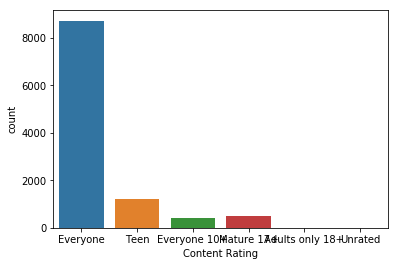

In [15]:
sns.countplot(x='Content Rating',data=gp)

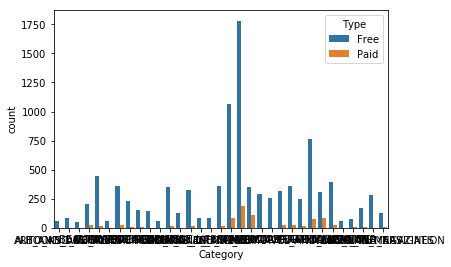

In [16]:
sns.countplot(x='Category',data=gp,hue='Type')